In [53]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [54]:
#Load the data
books = pd.read_csv("Books.csv", low_memory=False)
books.drop(columns=["Image-URL-L","Image-URL-M","Image-URL-S"], inplace=True)
books.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages


In [55]:
books.iloc[187689]["Book-Author"] = "Downes, Larissa Anne"

In [56]:
#Load other data 
ratings = pd.read_csv("Ratings.csv", low_memory=False)
ratings.tail()

,User-ID,ISBN,Book-Rating
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


In [57]:
users = pd.read_csv("Users.csv", low_memory=False)
users.drop(columns=["Age"], inplace=True)
users.tail()

,User-ID,Location
278853,278854,"portland, oregon, usa"
278854,278855,"tacoma, washington, united kingdom"
278855,278856,"brampton, ontario, canada"
278856,278857,"knoxville, tennessee, usa"
278857,278858,"dublin, n/a, ireland"


In [58]:
#'MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEACHER BOOKS)'
books.loc[37487, 'Year-Of-Publication'] = 1991

#'MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS)'
books.loc[55676, 'Year-Of-Publication'] = 2005

#'MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS)'
books.loc[37487, 'Book-Author'] = 'Bruce Coville'

#"Alice's Adventures in Wonderland and Through the Looking Glass (Puffin Books)"
books.loc[80264, 'Year-Of-Publication'] = 2003

#'Field Guide to the Birds of North America, 3rd Ed.'
books.loc[192993, 'Year-Of-Publication'] = 2003

#Crossing America
books.loc[78168, 'Year-Of-Publication'] = 2001

#Outline of European Architecture (Pelican S.)
books.loc[97826, 'Year-Of-Publication'] = 1981

#Three Plays of Eugene Oneill
books.loc[116053, 'Year-Of-Publication'] = 1995

books.loc[118294, 'Year-Of-Publication'] = 2023

#FOREST PEOPLE (Touchstone Books (Hardcover))
books.loc[228173, 'Year-Of-Publication'] = 1987

#In Our Time: Stories (Scribner Classic)
books.loc[240169, 'Year-Of-Publication'] = 1996

#Clout
books.loc[246842, 'Year-Of-Publication'] = 1925

#To Have and Have Not
books.loc[255409, 'Year-Of-Publication'] = 1937

#FOOTBALL SUPER TEAMS : FOOTBALL SUPER TEAMS
books.loc[260974, 'Year-Of-Publication'] = 1991

In [59]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

Text(0, 0.5, 'Author')

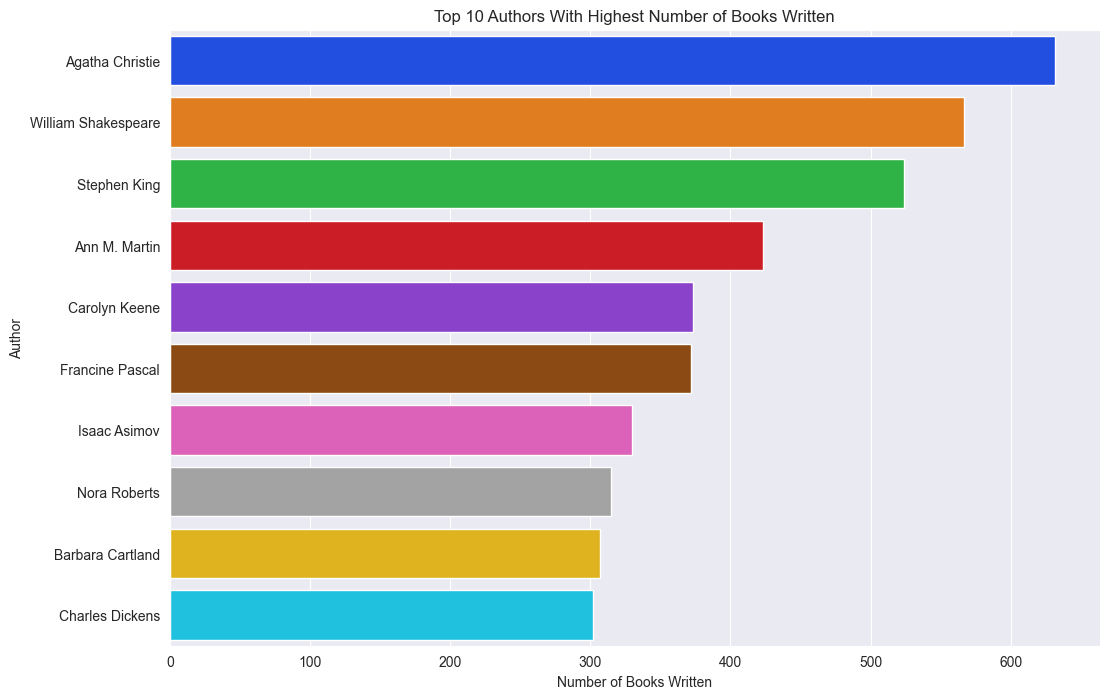

In [60]:
#Top 10 Authors
import seaborn as sns
import matplotlib.pyplot as plt

authors = books["Book-Author"].value_counts().head(10)

top_authors = pd.DataFrame({'Author': authors.index, 'Number of Books': authors.values})

plt.figure(figsize=(12, 8))
sns.barplot(data=top_authors, x='Number of Books', y='Author', palette="bright")

plt.title("Top 10 Authors With Highest Number of Books Written")
plt.xlabel("Number of Books Written")
plt.ylabel("Author")


Text(0, 0.5, 'Publisher')

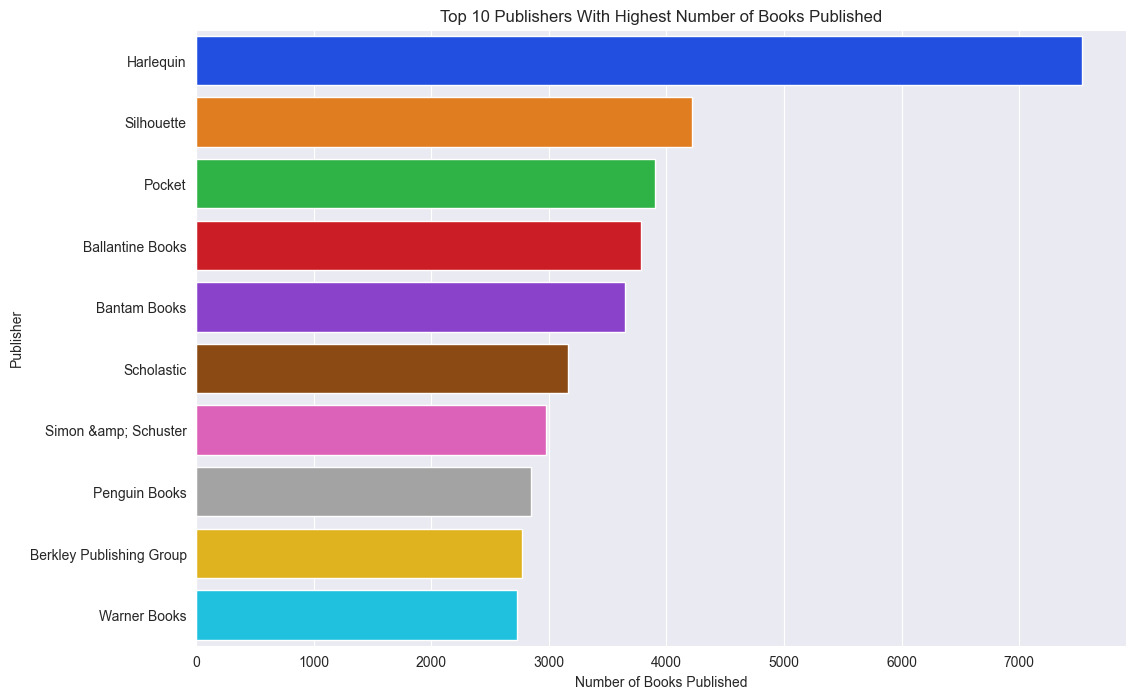

In [61]:
#Top 10 Publishers

publishers = books["Publisher"].value_counts().head(10)

top_publishers = pd.DataFrame({'Publisher': publishers.index, 'Number of Books': publishers.values})

plt.figure(figsize=(12, 8))
sns.barplot(data=top_publishers, x = "Number of Books", y = "Publisher", palette="bright" )

plt.title("Top 10 Publishers With Highest Number of Books Published")
plt.xlabel("Number of Books Published")
plt.ylabel("Publisher")

In [62]:
books.iloc[221678]['Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.iloc[221678]['Book-Author'] = 'James Buckley'
books.iloc[221678]['Year-Of-Publication'] = 2000
books.iloc[221678]['Publisher'] = 'DK Publishing Inc'

In [63]:
books.iloc[209538]['Book-Author'] = 'Michael Teitelbbaum'
books.iloc[209538][
    'Book-Title'] = 'DK Readers: The Story of the X-Men, How It All Began (Level 4: Proficient Readers)'
books.iloc[209538]['Year-Of-Publication'] = 2000
books.iloc[209538]['Publisher'] = 'DK Publishing Inc'

In [64]:
books.iloc[220731]['Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers'"
books.iloc[220731]['Book-Author'] = 'Jean-Marie Gustave Le Clézio'
books.iloc[220731]['Year-Of-Publication'] = 1990
books.iloc[220731]['Publisher'] = 'Gallimard'

In [65]:
books["Year-Of-Publication"] = books["Year-Of-Publication"].astype("int64")

display(books['Year-Of-Publication'].value_counts().sort_index().iloc[:20])
books['Year-Of-Publication'].value_counts().sort_index(ascending=False).iloc[:20]

Year-Of-Publication
0       4618
1376       1
1378       1
1806       1
1897       1
1900       3
1901       7
1902       2
1904       1
1906       1
1908       1
1909       2
1910       1
1911      19
1914       1
1917       1
1919       1
1920      33
1921       2
1922       2
Name: count, dtype: int64

Year-Of-Publication
2023        1
2021        1
2020        3
2012        1
2011        2
2010        2
2008        1
2006        3
2005       47
2004     5839
2003    14360
2002    17627
2001    17360
2000    17234
1999    17431
1998    15766
1997    14890
1996    14031
1995    13547
1994    11796
Name: count, dtype: int64

In [66]:
books.loc[37487, 'Year-Of-Publication'] = 1991
books.iloc[37487]

ISBN                                                          0671746103
Book-Title             MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...
Book-Author                                                Bruce Coville
Year-Of-Publication                                                 1991
Publisher                                                        Aladdin
Name: 37487, dtype: object

In [67]:
display(
    books['Year-Of-Publication'].value_counts().sort_index().iloc[:20])
books['Year-Of-Publication'].value_counts().sort_index(ascending=False).iloc[:20]

Year-Of-Publication
0       4618
1376       1
1378       1
1806       1
1897       1
1900       3
1901       7
1902       2
1904       1
1906       1
1908       1
1909       2
1910       1
1911      19
1914       1
1917       1
1919       1
1920      33
1921       2
1922       2
Name: count, dtype: int64

Year-Of-Publication
2023        1
2021        1
2020        3
2012        1
2011        2
2010        2
2008        1
2006        3
2005       47
2004     5839
2003    14360
2002    17627
2001    17360
2000    17234
1999    17431
1998    15766
1997    14890
1996    14031
1995    13547
1994    11796
Name: count, dtype: int64

In [68]:
books_year_rational = books[books['Year-Of-Publication']!=0]['Year-Of-Publication'].value_counts().sort_index(ascending=False).iloc[:20]
books_year_rational

Year-Of-Publication
2023        1
2021        1
2020        3
2012        1
2011        2
2010        2
2008        1
2006        3
2005       47
2004     5839
2003    14360
2002    17627
2001    17360
2000    17234
1999    17431
1998    15766
1997    14890
1996    14031
1995    13547
1994    11796
Name: count, dtype: int64

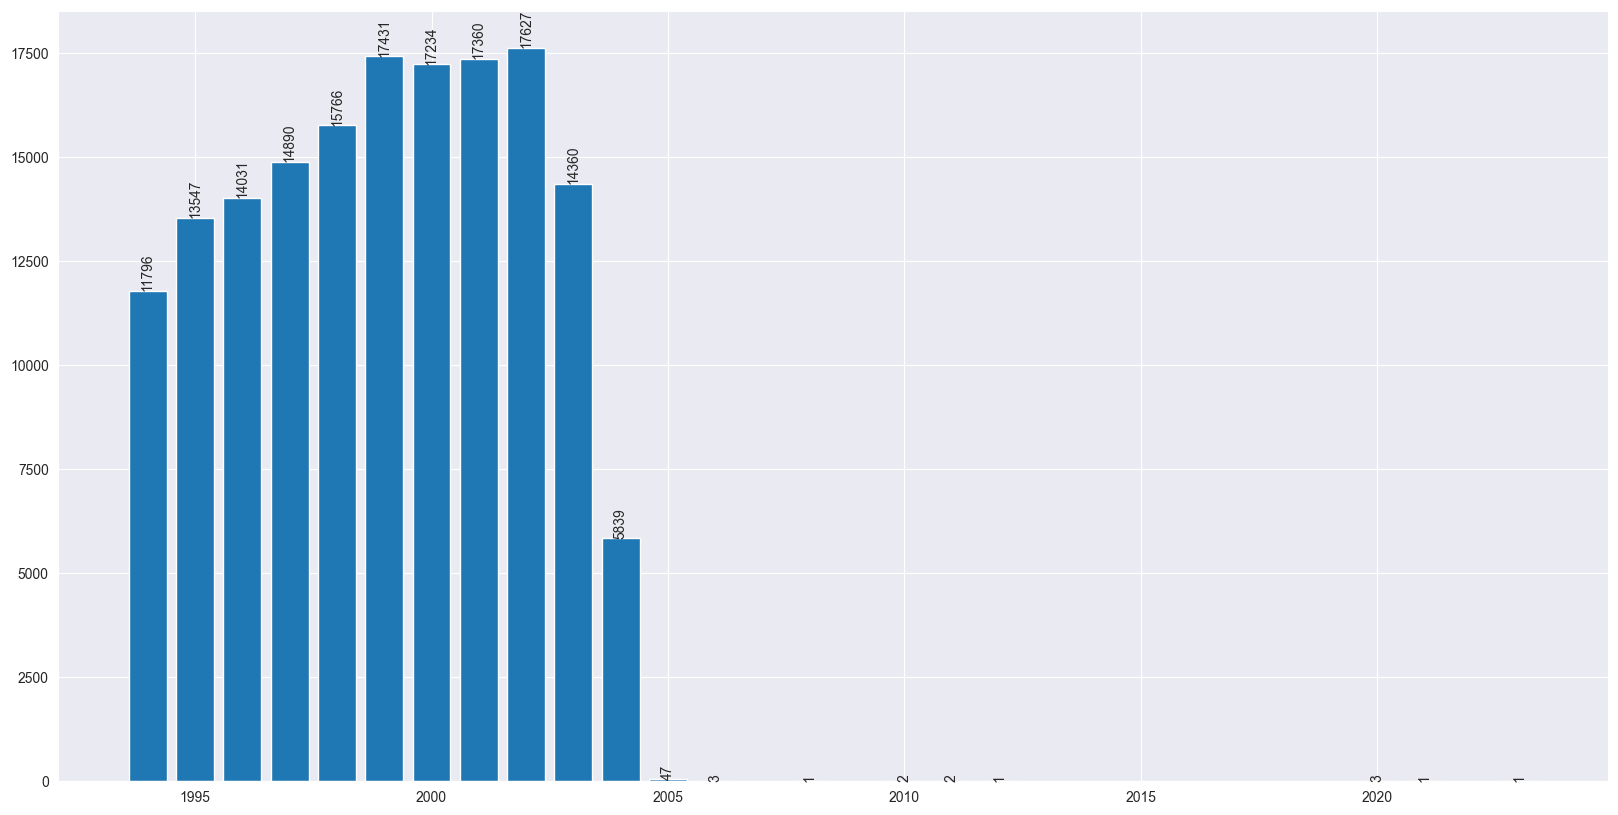

In [69]:
plt.figure(figsize=(20,10))
bars = plt.bar(x=books_year_rational.index,height=books_year_rational.values)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             '{:.0f}'.format(height), ha='center', va='bottom', rotation='vertical')
plt.show()

In [70]:
bookrating = pd.merge(ratings, books, on = "ISBN")
bookrating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [71]:
#Average rating of books
averagerating = pd.DataFrame(bookrating.groupby("ISBN")["Book-Rating"].mean().round(1))
averagerating.reset_index(inplace=True)
averagerating.head()

,ISBN,Book-Rating
0,0000913154,8.0
1,0001010565,0.0
2,0001046438,9.0
3,0001046713,0.0
4,000104687X,6.0


In [72]:
averagerating.rename(columns={"Book-Rating": "Average Rating"}, inplace=True)
averagerating.head()

,ISBN,Average Rating
0,0000913154,8.0
1,0001010565,0.0
2,0001046438,9.0
3,0001046713,0.0
4,000104687X,6.0


In [73]:
averageratingdf = pd.merge(bookrating, averagerating, on = "ISBN")
averageratingdf.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Average Rating
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,2.9
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,2.9
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,2.9
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,2.9
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,2.9


In [74]:
averageratingonly = averageratingdf[['ISBN','Average Rating']]
averageratingunique = averageratingonly[['ISBN','Average Rating']].drop_duplicates(subset=['ISBN'])
averageratingunique.head()

,ISBN,Average Rating
0,034545104X,2.9
60,0155061224,2.5
62,0446520802,4.1
178,052165615X,3.0
179,0521795028,6.0


In [75]:
ratingbooks = pd.merge(books, averageratingunique, on='ISBN', how='inner')

In [76]:
ratingbooks.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Average Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,4.9
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,5.0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,4.3
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,0.0


In [77]:
books_with_rating = pd.merge(books, averageratingunique, on='ISBN')
books_with_rating.shape

(270151, 6)

In [78]:
ratings_sorted = books_with_rating['Average Rating'].value_counts().sort_index(ascending=False)
display(ratings_sorted)
books_with_rating['Average Rating'].value_counts(normalize=True).round(4).sort_index(ascending=False)

Average Rating
10.0     13112
9.8         14
9.7         48
9.6          2
9.5        489
         ...  
0.4        124
0.3        102
0.2         49
0.1         12
0.0     120315
Name: count, Length: 100, dtype: int64

Average Rating
10.0    0.0485
9.8     0.0001
9.7     0.0002
9.6     0.0000
9.5     0.0018
         ...  
0.4     0.0005
0.3     0.0004
0.2     0.0002
0.1     0.0000
0.0     0.4454
Name: proportion, Length: 100, dtype: float64

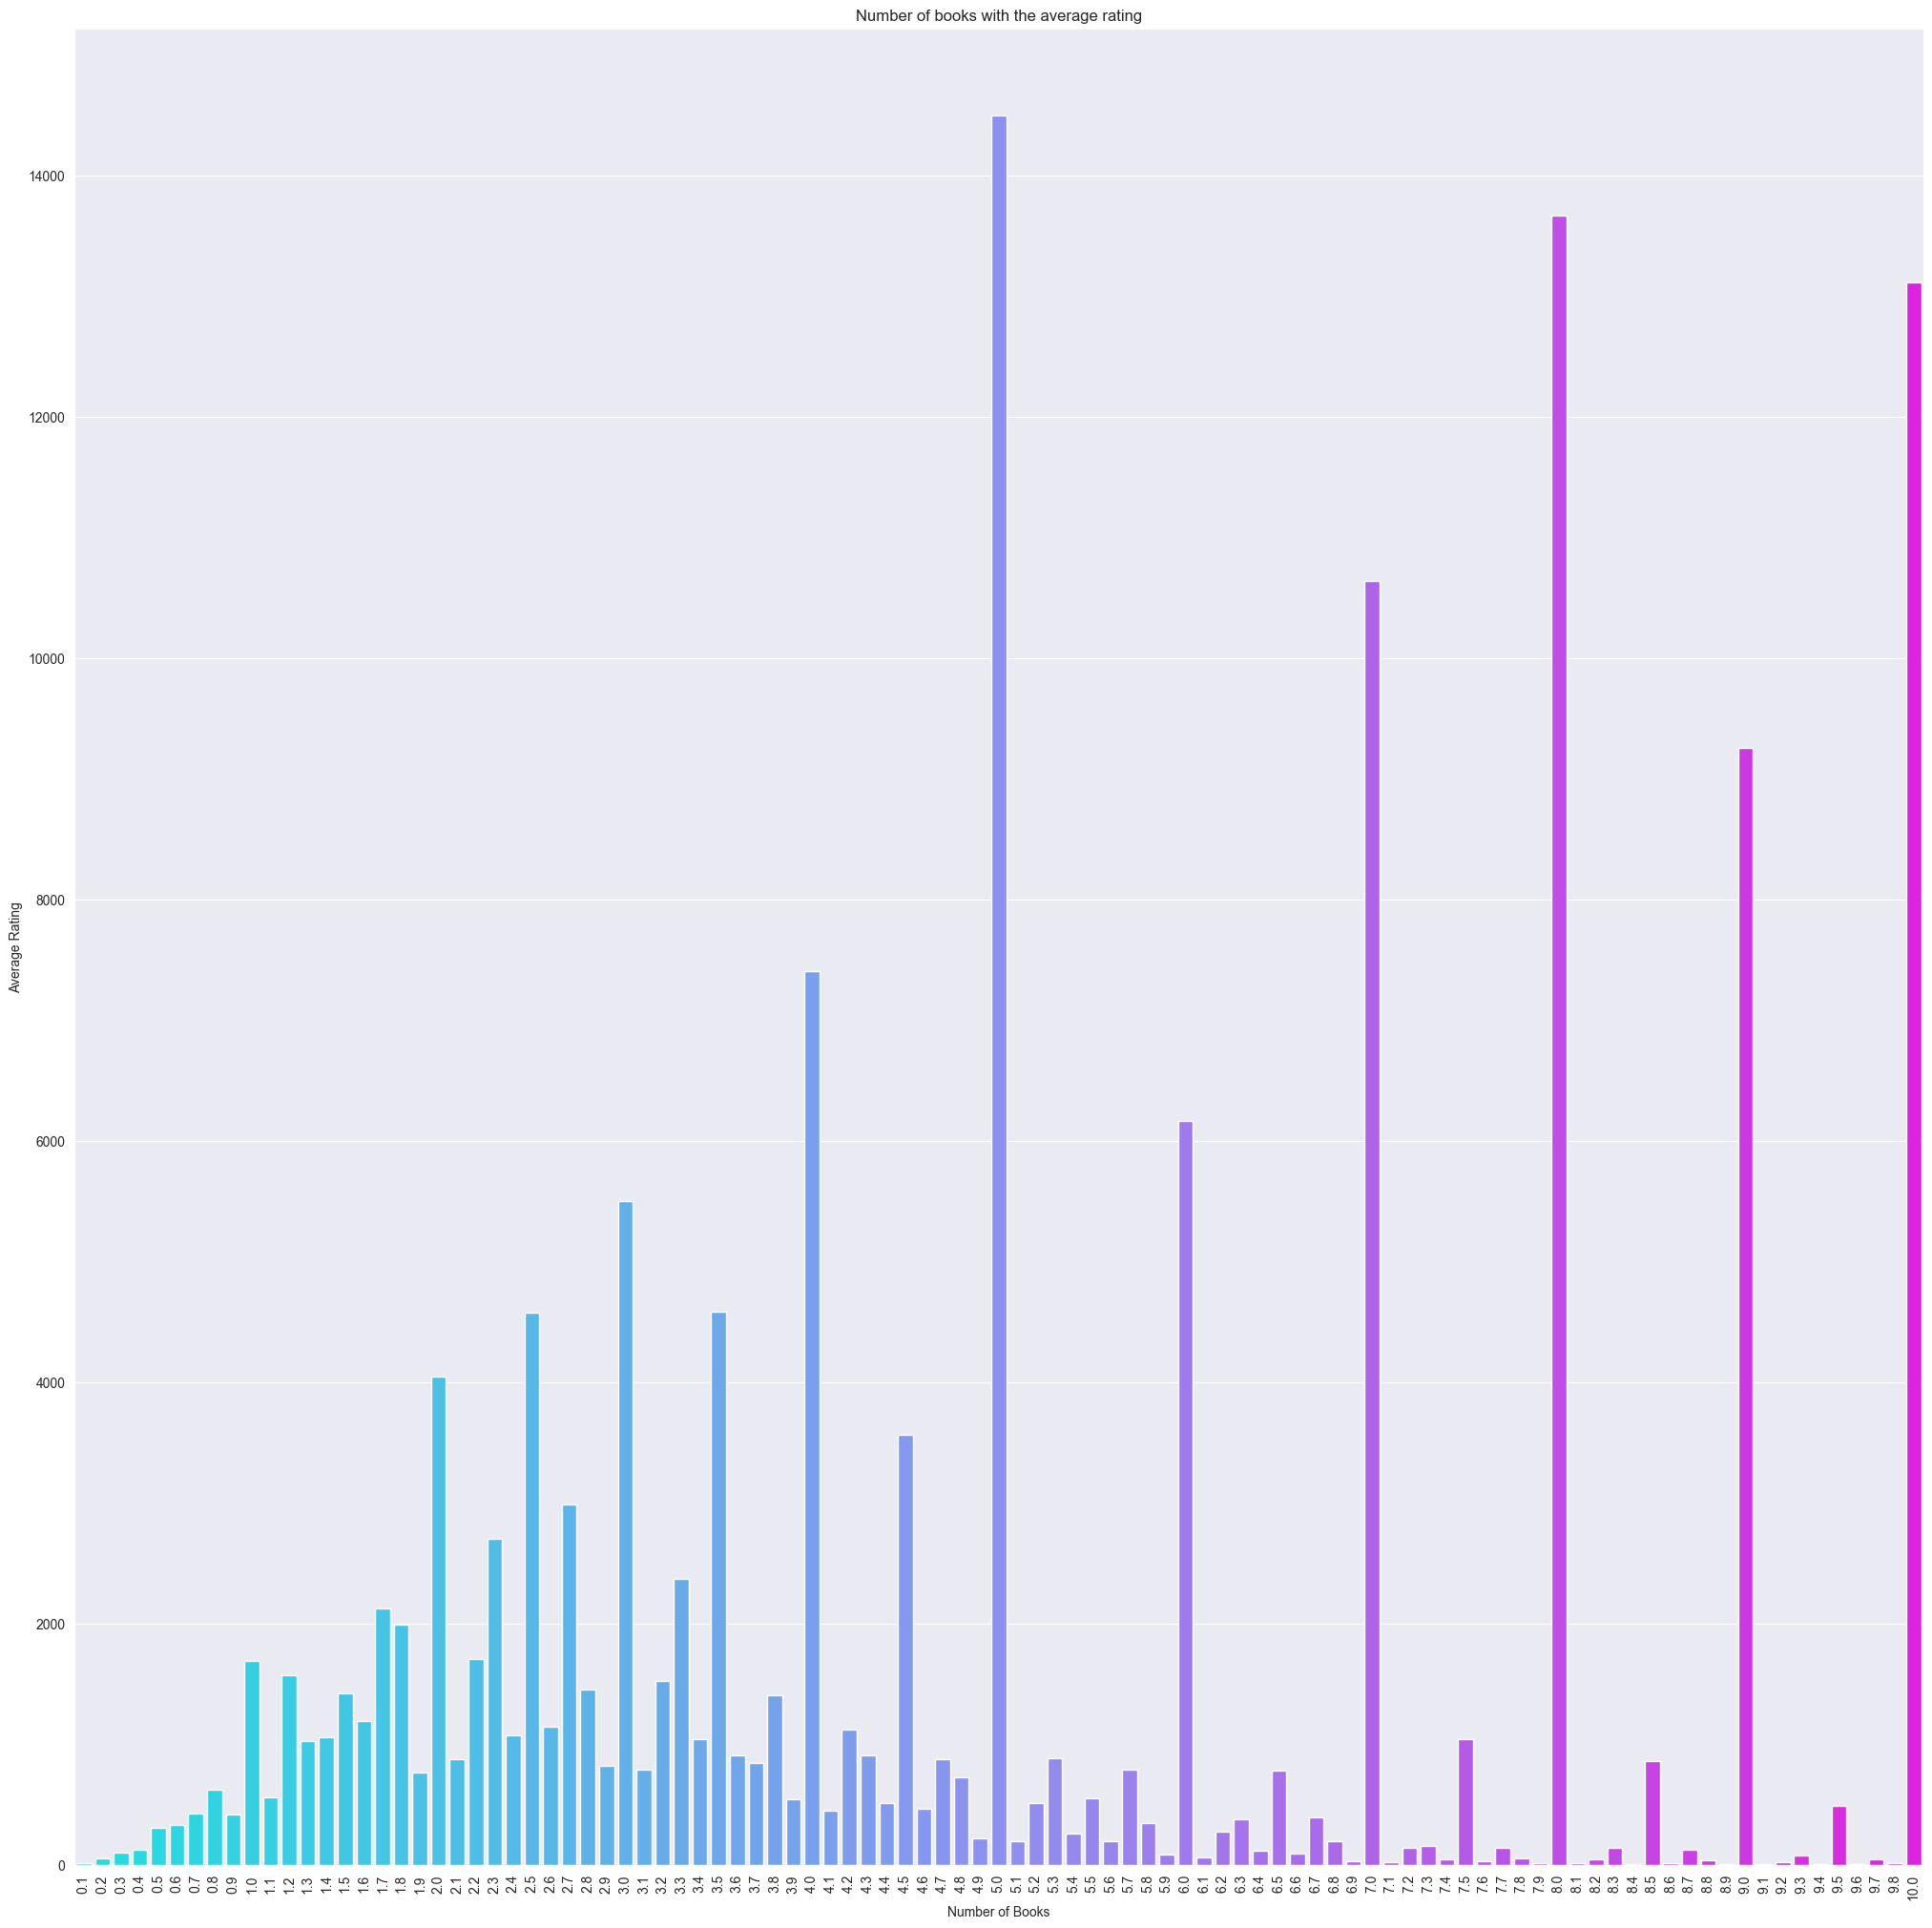

In [79]:
cool = sns.color_palette("cool", n_colors=len(ratings_sorted.values))
plt.figure(figsize=(25,25))
ratings_sorted_0_excluded = ratings_sorted.drop(index=0.0).sort_index(ascending=False)
sns_plot = sns.barplot(x=ratings_sorted_0_excluded.index, y=ratings_sorted_0_excluded.values ,palette=cool)
plt.xticks(rotation='vertical')
plt.xlabel("Number of Books")
plt.ylabel('Average Rating')
plt.title("Number of books with the average rating")
plt.show()

In [80]:
top_20_ratings = books_with_rating['Average Rating'].value_counts().drop(index=0.0).sort_values(ascending=False).head(20)

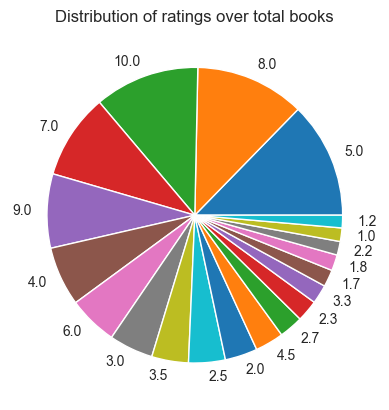

In [81]:
plt.pie(top_20_ratings, labels=top_20_ratings.index)
plt.title("Distribution of ratings over total books")
plt.show()

In [82]:
ratings_books_merged = ratings.merge(books, on='ISBN')
display(ratings_books_merged.head())

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [83]:
ratings_books_nonzero = ratings_books_merged[ratings_books_merged['Book-Rating']!=0]
num_rating_df = ratings_books_nonzero.groupby('Book-Title').count()['Book-Rating'].sort_values(ascending=False).reset_index()
num_rating_df.rename(columns={'Book-Rating':'Number-of-Ratings'}, inplace=True)
display(num_rating_df)

,Book-Title,Number-of-Ratings
0,The Lovely Bones: A Novel,707
1,Wild Animus,581
2,The Da Vinci Code,494
3,The Secret Life of Bees,406
4,The Nanny Diaries: A Novel,393
...,...,...
135562,Journeys with Elijah: Eight Tales of the Prophet,1
135563,Journeys to Door County,1
135564,Journeys of Simplicity: Traveling Light With T...,1
135565,Journeys into Past Lives,1


In [84]:
avg_rating_df = ratings_books_nonzero.groupby('Book-Title').mean(numeric_only=True)['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'Average-Rating'}, inplace=True)
avg_rating_df.head()

,Book-Title,Average-Rating
0,A Light in the Storm: The Civil War Diary of ...,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
2,Dark Justice,10.000000
3,Earth Prayers From around the World: 365 Pray...,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,10.000000


In [85]:
popularity_df = pd.merge(num_rating_df, avg_rating_df, on='Book-Title')
popularity_df

,Book-Title,Number-of-Ratings,Average-Rating
0,The Lovely Bones: A Novel,707,8.185290
1,Wild Animus,581,4.390706
2,The Da Vinci Code,494,8.439271
3,The Secret Life of Bees,406,8.477833
4,The Nanny Diaries: A Novel,393,7.437659
...,...,...,...
135562,Journeys with Elijah: Eight Tales of the Prophet,1,10.000000
135563,Journeys to Door County,1,8.000000
135564,Journeys of Simplicity: Traveling Light With T...,1,6.000000
135565,Journeys into Past Lives,1,8.000000


In [86]:
popularity_df_above_100 = popularity_df[popularity_df['Number-of-Ratings']>=100]
popularity_df_above_50 = popularity_df[popularity_df['Number-of-Ratings'] >= 50]
popularity_df_above_250 = popularity_df[popularity_df['Number-of-Ratings'] >= 250]
popularity_df_above_100.sort_values(by='Average-Rating', ascending=False).head()

,Book-Title,Number-of-Ratings,Average-Rating
113,"The Two Towers (The Lord of the Rings, Part 2)",136,9.330882
180,"The Return of the King (The Lord of the Rings,...",103,9.213592
27,Harry Potter and the Goblet of Fire (Book 4),247,9.125506
68,Harry Potter and the Sorcerer's Stone (Book 1),176,9.062500
42,Harry Potter and the Order of the Phoenix (Boo...,211,9.047393


In [87]:
#Defining a new function that can calculate the metric
def calcWeightedRating(row, avgRating, numOfRatings, minThres, defRating):
    weightedRating = ((row[avgRating] * row[numOfRatings]) + (minThres * defRating))/(row[numOfRatings] + minThres)
    return weightedRating

In [88]:
#For number of ratings above 100
popularity_df_above_100 = popularity_df_above_100.copy()
popularity_df_above_100['Weighted-Rating'] = popularity_df_above_100.apply(lambda x: calcWeightedRating(
     x, 'Average-Rating', 'Number-of-Ratings', 100, 5),axis=1)
popularity_df_above_100.sort_values(
    'Weighted-Rating', ascending=False).head(20)

,Book-Title,Number-of-Ratings,Average-Rating,Weighted-Rating
11,Harry Potter and the Sorcerer's Stone (Harry P...,315,8.936508,7.987952
17,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321,7.970822
9,Harry Potter and the Chamber of Secrets (Book 2),326,8.840491,7.938967
27,Harry Potter and the Goblet of Fire (Book 4),247,9.125506,7.936599
20,To Kill a Mockingbird,267,8.977528,7.893733
2,The Da Vinci Code,494,8.439271,7.860269
0,The Lovely Bones: A Novel,707,8.185290,7.790582
3,The Secret Life of Bees,406,8.477833,7.790514
42,Harry Potter and the Order of the Phoenix (Boo...,211,9.047393,7.745981
47,The Fellowship of the Ring (The Lord of the Ri...,205,8.882927,7.609836


In [89]:
#For number of ratings above 50
popularity_df_above_50 = popularity_df_above_50.copy()
popularity_df_above_50['Weighted-Rating'] = popularity_df_above_50.apply(lambda x: calcWeightedRating(
    x, 'Average-Rating', 'Number-of-Ratings', 50, 5), axis=1)
popularity_df_above_50.sort_values(
    'Weighted-Rating', ascending=False).head(20)

,Book-Title,Number-of-Ratings,Average-Rating,Weighted-Rating
27,Harry Potter and the Goblet of Fire (Book 4),247,9.125506,8.430976
17,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321,8.425076
11,Harry Potter and the Sorcerer's Stone (Harry P...,315,8.936508,8.397260
20,To Kill a Mockingbird,267,8.977528,8.350158
9,Harry Potter and the Chamber of Secrets (Book 2),326,8.840491,8.329787
42,Harry Potter and the Order of the Phoenix (Boo...,211,9.047393,8.272031
113,"The Two Towers (The Lord of the Rings, Part 2)",136,9.330882,8.166667
68,Harry Potter and the Sorcerer's Stone (Book 1),176,9.062500,8.163717
2,The Da Vinci Code,494,8.439271,8.123162
47,The Fellowship of the Ring (The Lord of the Ri...,205,8.882927,8.121569


In [90]:
#For number of ratings above 250
popularity_df_above_250 = popularity_df_above_250.copy()
popularity_df_above_250['Weighted-Rating'] = popularity_df_above_250.apply(lambda x: calcWeightedRating(
    x, 'Average-Rating', 'Number-of-Ratings', 250, 5), axis=1)
popularity_df_above_250.sort_values(
    'Weighted-Rating', ascending=False).head(20)

,Book-Title,Number-of-Ratings,Average-Rating,Weighted-Rating
0,The Lovely Bones: A Novel,707,8.185290,7.353187
2,The Da Vinci Code,494,8.439271,7.283602
11,Harry Potter and the Sorcerer's Stone (Harry P...,315,8.936508,7.194690
9,Harry Potter and the Chamber of Secrets (Book 2),326,8.840491,7.173611
3,The Secret Life of Bees,406,8.477833,7.152439
17,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321,7.125237
20,To Kill a Mockingbird,267,8.977528,7.054159
5,The Red Tent (Bestselling Backlist),383,8.182768,6.925750
26,"Tuesdays with Morrie: An Old Man, a Young Man,...",250,8.588000,6.794000
8,Life of Pi,336,8.080357,6.766212


In [91]:
popular_df_merge = pd.merge(popularity_df_above_100, books, on='Book-Title').drop_duplicates('Book-Title',keep='first')
display(popular_df_merge.shape)
popular_df_merge.sort_values('Weighted-Rating', ascending=False).head(10)

(200, 8)

,Book-Title,Number-of-Ratings,Average-Rating,Weighted-Rating,ISBN,Book-Author,Year-Of-Publication,Publisher
38,Harry Potter and the Sorcerer's Stone (Harry P...,315,8.936508,7.987952,059035342X,J. K. Rowling,1999,Arthur A. Levine Books
56,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321,7.970822,0439136350,J. K. Rowling,1999,Scholastic
32,Harry Potter and the Chamber of Secrets (Book 2),326,8.840491,7.938967,0439064872,J. K. Rowling,2000,Scholastic
107,Harry Potter and the Goblet of Fire (Book 4),247,9.125506,7.936599,0439139597,J. K. Rowling,2000,Scholastic
67,To Kill a Mockingbird,267,8.977528,7.893733,0446310786,Harper Lee,1988,Little Brown &amp; Company
2,The Da Vinci Code,494,8.439271,7.860269,0385504209,Dan Brown,2003,Doubleday
0,The Lovely Bones: A Novel,707,8.185290,7.790582,0316666343,Alice Sebold,2002,"Little, Brown"
8,The Secret Life of Bees,406,8.477833,7.790514,0142001740,Sue Monk Kidd,2003,Penguin Books
167,Harry Potter and the Order of the Phoenix (Boo...,211,9.047393,7.745981,043935806X,J. K. Rowling,2003,Scholastic
185,The Fellowship of the Ring (The Lord of the Ri...,205,8.882927,7.609836,0345339703,J.R.R. TOLKIEN,1986,Del Rey


In [92]:
ratings_books_merged.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [93]:
users_ratings_count = ratings_books_merged.groupby('User-ID').count()['ISBN']
users_ratings_count = users_ratings_count.sort_values(ascending=False).reset_index()
users_ratings_count.rename(columns={'ISBN':'No-of-Books-Rated'}, inplace=True)
display(users_ratings_count.shape)
users_ratings_count.head()

(92106, 2)

,User-ID,No-of-Books-Rated
0,11676,11144
1,198711,6456
2,153662,5814
3,98391,5779
4,35859,5646


In [94]:
users_200 = users_ratings_count[users_ratings_count['No-of-Books-Rated']>=200]
display(users_200.shape)

(816, 2)

In [95]:
books_with_users_200 = pd.merge(users_200, ratings_books_merged, on='User-ID')
display(books_with_users_200.shape)
books_with_users_200.head()

(475007, 8)

,User-ID,No-of-Books-Rated,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,11676,11144,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books
1,11676,11144,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday
2,11676,11144,0449006522,8,Manhattan Hunt Club,JOHN SAUL,2002,Ballantine Books
3,11676,11144,0553561618,0,Dark Paradise,TAMI HOAG,1994,Bantam
4,11676,11144,055356451X,9,Night Sins,TAMI HOAG,1995,Bantam


In [96]:
display(ratings_books_merged.shape)
ratings_books_merged.head()

(1031136, 7)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [97]:
books_ratings_count = ratings_books_merged.groupby('Book-Title').count()['ISBN'].sort_values(ascending=False).reset_index()
books_ratings_count.rename(columns={'ISBN':'Number-of-Book-Ratings'}, inplace=True)
books_ratings_count.head()

,Book-Title,Number-of-Book-Ratings
0,Wild Animus,2502
1,The Lovely Bones: A Novel,1295
2,The Da Vinci Code,898
3,A Painted House,838
4,The Nanny Diaries: A Novel,828


In [98]:
books_ratings_50 = books_ratings_count[books_ratings_count['Number-of-Book-Ratings']>=50]
display(books_ratings_50.shape)
books_ratings_50.head()

(2444, 2)

,Book-Title,Number-of-Book-Ratings
0,Wild Animus,2502
1,The Lovely Bones: A Novel,1295
2,The Da Vinci Code,898
3,A Painted House,838
4,The Nanny Diaries: A Novel,828


In [99]:
filtered_books = pd.merge(books_ratings_50, books_with_users_200,  on='Book-Title')
display(filtered_books.shape)
filtered_books.head()

(112423, 9)

,Book-Title,Number-of-Book-Ratings,User-ID,No-of-Books-Rated,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher
0,Wild Animus,2502,11676,11144,0971880107,6,Rich Shapero,2004,Too Far
1,Wild Animus,2502,198711,6456,0971880107,0,Rich Shapero,2004,Too Far
2,Wild Animus,2502,153662,5814,0971880107,0,Rich Shapero,2004,Too Far
3,Wild Animus,2502,35859,5646,0971880107,0,Rich Shapero,2004,Too Far
4,Wild Animus,2502,76352,3329,0971880107,0,Rich Shapero,2004,Too Far


In [100]:
famous_books = filtered_books.groupby('Book-Title').count().reset_index()
famous_books = famous_books['Book-Title']
famous_books = books[books['Book-Title'].isin(famous_books)]
famous_books = famous_books.copy()
famous_books.drop_duplicates(subset=['Book-Title'], inplace=True, keep='first')
famous_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
14,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998,Health Communications
18,0440234743,The Testament,John Grisham,1999,Dell
19,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume
26,0971880107,Wild Animus,Rich Shapero,2004,Too Far
...,...,...,...,...,...
58940,0553245856,Side Effects,Michael Palmer,1985,Bantam Doubleday Dell
60057,0061092886,The Fallen Man (Joe Leaphorn Novels),Tony Hillerman,1997,HarperTorch
68105,0060176806,Love in Another Town,Barbara Taylor Bradford,1995,Harpercollins
76769,0553587188,Lucky's Lady,TAMI HOAG,2003,Bantam


In [101]:
pt = filtered_books.pivot_table(index='Book-Title',columns='User-ID', values='Book-Rating')
pt.fillna(0, inplace=True)
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\O\"" Is for Outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0


In [102]:
similarities = cosine_similarity(pt)
similarities

array([[1.        , 0.        , 0.        , ..., 0.0554792 , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.08924832, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.04205081, 0.02140784,
        0.02848022],
       ...,
       [0.0554792 , 0.08924832, 0.04205081, ..., 1.        , 0.02461062,
        0.03274109],
       [0.        , 0.        , 0.02140784, ..., 0.02461062, 1.        ,
        0.23165548],
       [0.        , 0.        , 0.02848022, ..., 0.03274109, 0.23165548,
        1.        ]])

In [103]:
#Retrieving the index of book
np.where(pt.index=='1984')

(array([2], dtype=int64),)

In [104]:
np.where(pt.index=='stardust')[0][0]

2443

In [105]:
#For the 1st book in the pivot table
display(similarities[0])

#Chaining from the above
similarities[np.where(pt.index=='stardust')[0][0]]

array([1.       , 0.       , 0.       , ..., 0.0554792, 0.       ,
       0.       ])

array([0.        , 0.        , 0.02848022, ..., 0.03274109, 0.23165548,
       1.        ])

In [106]:
listof = list(enumerate(similarities[0]))

In [107]:
#Sorting without index 
sorted_index = sorted(listof, key=lambda x: x[1], reverse=True)

In [108]:
sorted(list(enumerate(similarities[0])), key=lambda x: x[1], reverse=True)[1:6]

[(505, 0.5301650263637131),
 (707, 0.49980721032635916),
 (2250, 0.49980721032635916),
 (2067, 0.41586473646422367),
 (1669, 0.3945239297317875)]

In [109]:
for book in sorted(list(enumerate(similarities[0])), key=lambda x: x[1], reverse=True)[1:6]:
    print(book[0])

505
707
2250
2067
1669


In [110]:
for book in sorted(list(enumerate(similarities[0])), key=lambda x: x[1], reverse=True)[1:6]:
    print(pt.index[book[0]])

Decider
Free Fall
Therapy
The Pied Piper
The 13th Juror


In [111]:
if 'hamkmfa' in pt.index:
    np.where(pt.index=='hamkda')[0][0]
else:
    print('Book not found')

Book not found


In [112]:
def recommend(book_name):
    if book_name in pt.index:
        index = np.where(pt.index == book_name)[0][0]
        similar_books_list = sorted(
        list(enumerate(similarities[index])), key=lambda x: x[1], reverse=True)[1:11]
        
        print(f'Recommendations for the book {book_name}:')
        print('-'*5)
        for book in similar_books_list:
            print(pt.index[book[0]])
        print('\n')

    else:
        print('Book Not Found')
        print('\n')

recommend('Harry Potter and the Chamber of Secrets (Book 2)')
recommend('1984')
recommend('Message in a Bottle')
recommend('The Da Vinci Code')
recommend('The Return of the King (The Lord of the Rings, Part 3)')
recommend('The Hobbit')

Recommendations for the book Harry Potter and the Chamber of Secrets (Book 2):
-----
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)
Charlotte's Web (Trophy Newbery)
The Fellowship of the Ring (The Lord of the Rings, Part 1)
The Shelters of Stone (Earth's Children Series, No 5)
The Eye of the World (The Wheel of Time, Book 1)
Stiff: The Curious Lives of Human Cadavers


Recommendations for the book 1984:
-----
Lying Awake
The Restaurant at the End of the Universe (Hitchhiker's Trilogy (Paperback))
Waiting
Animal Farm
The Handmaid's Tale
Roll of Thunder, Hear My Cry
Awakening
A Portrait of the Artist As a Young Man
Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death
Brave New World


Recommendations for the book Message in a Bottle:
-----
Nights in Rodanthe
The 